In [13]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


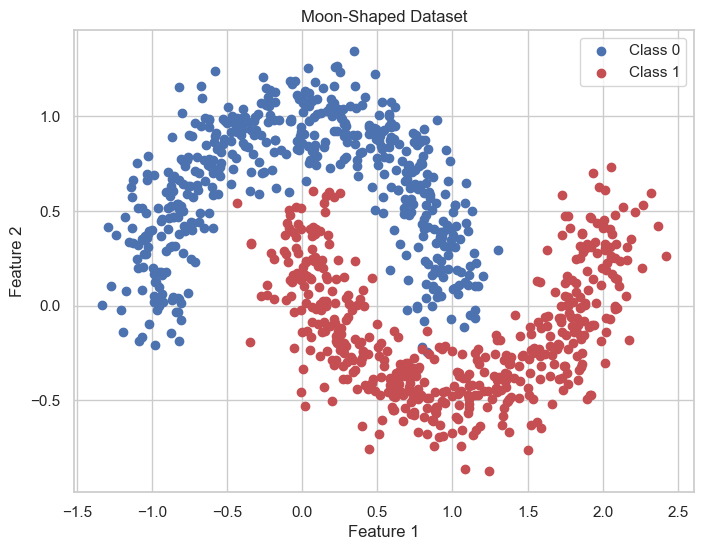

In [14]:
## get data

# Create a moon-shaped dataset with 1000 samples
X, y = utils.make_moons(n_samples=1000, noise=0.15, random_state=42)

# X contains the data points, and y contains their corresponding labels (0 or 1)
utils.plot_moons(X, y)

 <div style="color: green; font-weight:
bold">KDE essentially the same. Not OOP oriented though.</div>

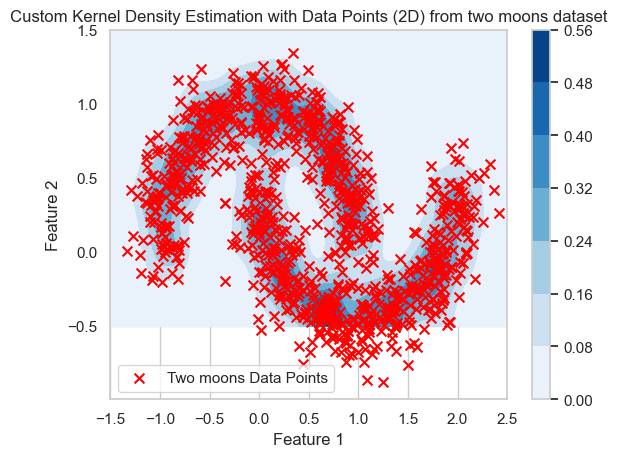

In [15]:
def custom_kernel_density_estimation(data, query_points, bandwidth):
    kde_values = []
    for query_point in query_points:
        # Calculate the kernel density estimate for a single query point
        kde_value = 0
        for data_point in data:
            # Gaussian kernel function
            kernel_value = np.exp(-0.5 * np.sum((query_point - data_point)**2) / bandwidth**2) / (2 * np.pi * bandwidth**2)
            kde_value += kernel_value
        kde_values.append(kde_value / len(data))
    return kde_values

# Set the query points for which you want to estimate the KDE
x_values = np.linspace(-1.5, 2.5, 100)
y_values = np.linspace(-0.5, 1.5, 100)
xx, yy = np.meshgrid(x_values, y_values)
query_points = np.c_[xx.ravel(), yy.ravel()]

# Bandwidth parameter (you can adjust this for smoothing)
bandwidth = 0.1

# Calculate the custom KDE for the query points
custom_kde_values = custom_kernel_density_estimation(X, query_points, bandwidth)

# Reshape the KDE values to match the grid shape
custom_kde_values = np.array(custom_kde_values).reshape(xx.shape)

# Plot the custom KDE as a contour plot
plt.contourf(xx, yy, custom_kde_values, cmap=plt.cm.Blues)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], marker='x', label="Two moons Data Points", color='red', s=50)
plt.title("Custom Kernel Density Estimation with Data Points (2D) from two moons dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


 <div style="color: green; font-weight:
bold">Sampling is based on random.choice instead of random.normal as in the solution, but the outcome si the same.</div>

In [16]:
def generate_samples(query_points,custom_kde_values,num_samples=100):

    ## normalize kde values
    custom_kde_values /= np.sum(custom_kde_values)

    samples = []
    for _ in range(num_samples):
        sample = query_points[np.random.choice(len(query_points), p=custom_kde_values.ravel())]
        samples.append(sample)

    # Convert the samples to a NumPy array
    samples = np.array(samples)
    return samples

 <div style="color: green; font-weight:
bold">Note: the plot shows the orange points to be "Gaussian" but that is a mistake in writting the title, not in the code itself.</div>

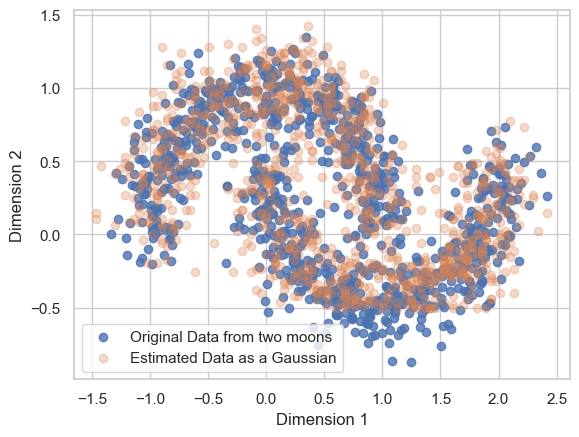

In [17]:
## measure MMD between the generated and the original data
# Normalize the KDE values to make it a proper probability density
custom_kde_values /= np.sum(custom_kde_values)
num_samples = 1000
samples = []
for _ in range(num_samples):
    sample = query_points[np.random.choice(len(query_points), p=custom_kde_values.ravel())]
    samples.append(sample)

# Convert the samples to a NumPy array
samples = np.array(samples)
utils.plot_estimated_real_two_moons(X,samples)

In [18]:
import torch

result = utils.MMD(torch.tensor(X), torch.tensor(samples), kernel="inverse_multi_quadratic")

print(f"MMD result of X and Y is {result.item()}")

MMD result of X and Y is 0.006730338092893362


### TODO: KDE with different bandwith estimation 

In [21]:
bandwidth = list(np.linspace(0.01,1,20))

MMDS_vs_bandwith = []

for b in bandwidth:
    x_values = np.linspace(-1.5, 2.5, 100)
    y_values = np.linspace(-0.5, 1.5, 100)
    xx, yy = np.meshgrid(x_values, y_values)
    query_points = np.c_[xx.ravel(), yy.ravel()]
    custom_kde_values = custom_kernel_density_estimation(X, query_points, b)

    # Reshape the KDE values to match the grid shape
    custom_kde_values = np.array(custom_kde_values).reshape(xx.shape)
    samples = generate_samples(query_points,custom_kde_values,num_samples=1000)

    result = utils.MMD(torch.tensor(X), torch.tensor(samples), kernel="inverse_multi_quadratic")
    print(f"MMD result of X and Y is {result.item()}")
    MMDS_vs_bandwith.append((result.item(),b))

MMD result of X and Y is 0.008310148492455482
MMD result of X and Y is 0.006696722470223904
MMD result of X and Y is 0.005412242840975523
MMD result of X and Y is 0.0119491470977664
MMD result of X and Y is 0.0099330497905612
MMD result of X and Y is 0.01758631505072117
MMD result of X and Y is 0.016375459730625153
MMD result of X and Y is 0.018786199390888214
MMD result of X and Y is 0.02457590028643608
MMD result of X and Y is 0.023729298263788223
MMD result of X and Y is 0.027130942791700363
MMD result of X and Y is 0.036459412425756454
MMD result of X and Y is 0.045845452696084976
MMD result of X and Y is 0.045378219336271286
MMD result of X and Y is 0.04357900097966194
MMD result of X and Y is 0.04478646069765091
MMD result of X and Y is 0.041751254349946976
MMD result of X and Y is 0.06254570931196213
MMD result of X and Y is 0.058408383280038834
MMD result of X and Y is 0.05599549785256386


 <div style="color: green; font-weight:
bold">Although this looks different from the provided solution, please not that it is in fact the same graph. The MMD is between 0.01 and 0.06, so that is little variance and it is zoomed in. In the provided solution graph the KDE appears to be rather constant because the graph is not zoomed in, but its the same.</div>

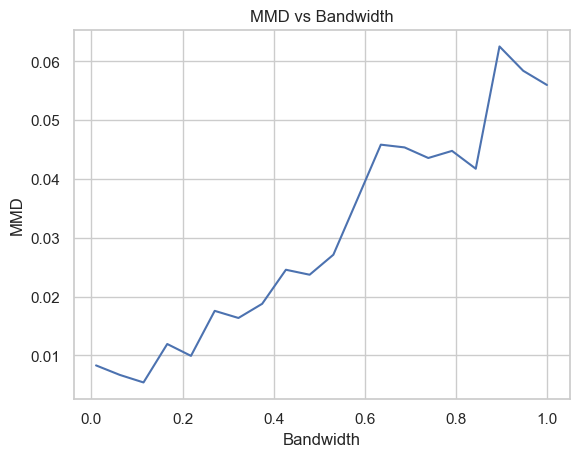

In [22]:
### increasing the bandwidth increases the MMD
plt.plot([x[1] for x in MMDS_vs_bandwith],[x[0] for x in MMDS_vs_bandwith])
plt.xlabel("Bandwidth")
plt.ylabel("MMD")
plt.title("MMD vs Bandwidth")
plt.show()